# Perceptron 

- This tutorial incarnates perceptron as an object-oriented API and learns how to train the perceptron object using an Iris flowers dataset.

### Import libraries

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Instantiate perceptron class

In [3]:
class Perceptron(object):
    def __init__(self, lr=0.01, epochs=50, random_stata=1):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state
        
        # self.w_: 1-d array; learned weights
        # self.errors_: list; a list of classification errors accumulated from each epoch
        
    def fit(self, X, y):
        # parameters:
        # X: {array-like}, shape = [n_samples, n_features]; training data
        # y: array-like, shape = [n_samples]; target (label) data
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                error += int(update == 0.0)
            self.errors_.append(error)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) # using unit step function
    

### Load Iris flowers dataset

In [27]:
df = pd.read_csv('./Iris.csv', header=None, encoding='utf-8', index_col=0)[1:]
df.head()

,1,2,3,4,5
0,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
y = df.iloc[0:100, 4].to_numpy()
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].to_numpy(dtype='float32')

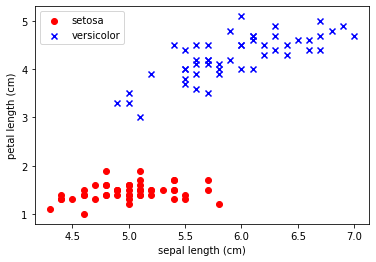

In [47]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()